# Challenge 1 - Identify a loud binary black hole signal in white Gaussian noise
Amélie Orban, 14/02/22.  

Use the data file "challenge1.gwf". The channel name is "H1:CHALLENGE1".
The data is white, Gaussian noise containing a simulated BBH signal. [Link to the data file.](https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf)


## Install and import statements
Firstly, numerous librairies and packages have to be installed and they (or specific objects and functions from these librairies) must be imported into the code to be used.

In [ ]:
# Installing the necessary packages
# For GW data analysis
! pip install -q 'lalsuite==6.82' 'PyCBC==1.18.0'
! pip install -q 'gwpy==2.0.2'
# For plotting
%matplotlib inline

In [ ]:
# Importing the packages in the code
import gwpy
from gwpy.timeseries import TimeSeries

## Question 1: Downloading the data
*Load the data into memory. What are the sampling rate and duration of the data?*

The data that is provided for this task needs to be downloaded into Colab and it must then be loaded into the code by creating an object (and reading the data and assigning it to said object) that we are going to use for the analysis. Using this object, we can retrieve information like the sampling rate and the duration of the data. 

In [ ]:
# Download the data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

# Create a strain object using GWPY
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")
# Can print the content of the strain object to see the info it contains
print("This is the strain object created with the Challenge 1 data: \n", gwpy_strain)

--2022-02-12 15:15:58--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf’

challenge1.gwf      100%[===================>]   3.84M  6.14MB/s    in 0.6s    

2022-02-12 15:15:59 (6.14 MB/s) - ‘challenge1.gwf’ saved [4025674/4025674]

This is the strain object created with the Challenge 1 data: 
 TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)


In [ ]:
# Retrieve and print the sampling rate (rate of samples per second [Hz]) and duration of the data

sample_rate = 1.0/gwpy_strain.dt # dt = time between successive samples [s]
print("\n The sampling rate of the data is: ", sample_rate)

print("\n Checking the time values of this data: ", gwpy_strain.times)
len_times = len(gwpy_strain.times)
duration = gwpy_strain.times[len_times-1] - gwpy_strain.times[0]
print("\n The duration of the data is: ", duration)


 The sampling rate of the data is:  4096.0 1 / s

 Checking the time values of this data:  [-64.         -63.99975586 -63.99951172 ...  63.99926758
  63.99951172  63.99975586] s

 The duration of the data is:  127.999755859375 s


## Question 2: Plotting 
*Plot the data in the time-domain.*

Now that the data is loaded and stored in an object from which we can retrieve useful information about the data, it is time to plot and visualise it. This can be done straightforwardly by plotting the data (with noise and signal) in the time-domain.

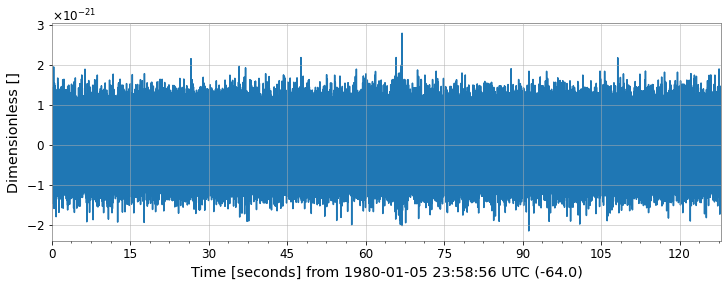

In [ ]:
# Plot the strain object containing the data
plot = gwpy_strain.plot()
ax = plot.gca()
ax.set_ylabel("Dimensionless []")
plot.show(warn=False)

## Question 3: Identifying the signal using a Q-transform
*Plot a spectrogram (or q-transform) of the data, and try to identify the signal.*

In order to determine where (or rather, when) the binary black hole merger happens and to be able to distinguish it from the noise that is also included in the data, we can use a Q-transform.

A Q-transform is a filter that creates a time-frequency representation of the data which can highlight important and relevant features at different frequencies. It shows how the frequency distribution of the data evolves over time, with the color representing the relative power of each frequency. It can be used to determine where the signal of the BH merger is located in the time range (as the signal should appear in the form of a "chirp").


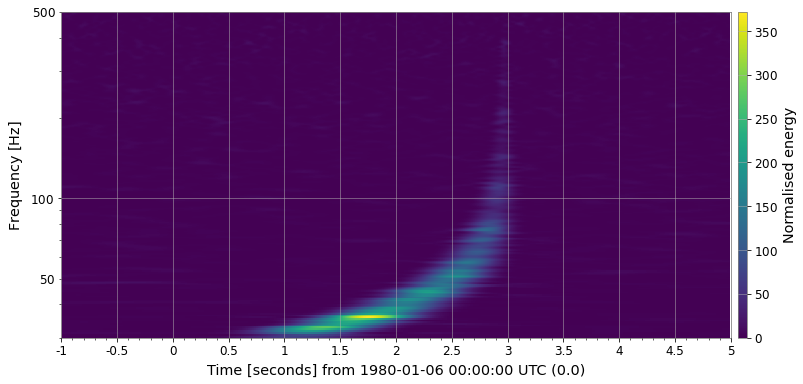

In [ ]:
# Compute the Q-transform of the data
  # frange = frequency range to scan
  # qrange = range of Qs to scan
  # use OUTSEG for smaller time range (focus on the signal)
q_gwpy_strain = gwpy_strain.q_transform(frange=(30, 500), qrange=(100,110), outseg=(-1,5)) 

# Plot the result time-frequency representation
plot = q_gwpy_strain.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

## Question 4: Time of merger
*What is the time of the merger?*

Using the Q-transform effectuated above, the time of merger can be read off the plot. In this case, the frequency distribution in the signal starts to increase (higher frequency are more significant) around 1 sec, and this increase ends around 3 sec. The point where the signal "disappears" is where the merger actually happens, so around 3 sec according to the x-axis of this plot. This corresponds to +3 s in the time range of the data which goes from -64.0 s to 63.99975586 s. As we know that the data is lasting 127.999755859375 s, we can conclude that the merger happens 67.0 s after the start of the signal.